In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import solve_ivp
from functools import partial
from numba import jit

In [2]:
@jit
def RHS_diffusion_neumann(i,x):
    '''
    Integrates a diffusion with no flux boundary conditions
    t: float
    x: array 1d
    '''

    dxdt = np.zeros(len(x))

    dxdt[1:-1] = x[:-2] + x[2:] - 2*x[1:-1]

    # Apply the boundary conditions (no flux)
    dxdt[0] = x[1] - x[0]
    dxdt[-1] = x[-2] - x[-1]

    return dxdt

@jit
def RHS_diffusion_dirichlet(i,x):
    '''
    Integrates a diffusion with no flux boundary conditions
    t: float
    x: array 1d
    '''

    dxdt = np.zeros(len(x))

    dxdt[1:-1] = x[:-2] + x[2:] - 2*x[1:-1]

    # Apply the boundary conditions (no flux)
    dxdt[0] = 0
    dxdt[-1] = 0

    return dxdt

@jit
def integrate_pde(RHS, source_idx, source_amount, n_steps, dt):
    
    xt = np.empty(shape=(n_steps, 30))
    xt[0] = np.zeros(30)
    xt[0, source_idx] = source_amount

    for i in range(1,n_steps):
        xt[i] = xt[i-1] + RHS(i, xt[i-1]) * dt

    return xt



In [3]:
rng = np.random.default_rng(2025)
source_idxs = rng.integers(0,30, size=(50,))
source_amounts = rng.integers(100,200,size=(50,))

n_steps = 10000
dt = 1e-1

dataset = []

for sr, sa in zip(source_idxs, source_amounts):
    dataset.append(integrate_pde(RHS_diffusion_dirichlet, sr, sa, n_steps, dt).T)

dataset = np.stack(dataset)

In [4]:
# Add lognormal noise to the simulation
noisy_dataset = (
    np.exp(
        np.log(dataset) +
        rng.normal(scale=0.1, size=dataset.shape)
    )
)

/tmp/ipykernel_847539/2679205859.py:4: RuntimeWarning: divide by zero encountered in log
  np.log(dataset) +


(0.0, 100.0)

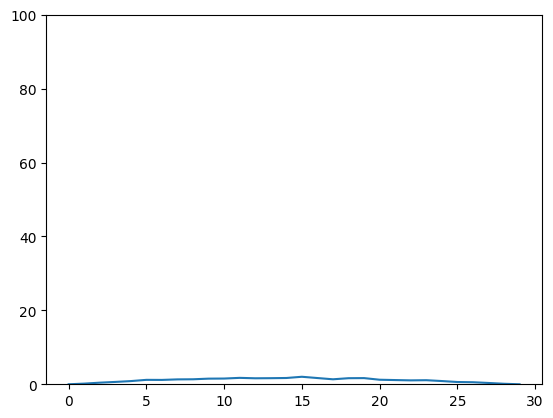

In [5]:
dataset.dtype

plt.plot(noisy_dataset[40,:,1000])
plt.ylim(0,100)

In [23]:
us = rng.uniform(0,1, size=2000)
thetas = np.arcsin(2*us-1)
phis = rng.uniform(0,2*np.pi, size=2000)
R = 1

points = np.stack([
    R*np.sin(thetas),
    R*np.cos(thetas)*np.cos(phis),
    R*np.cos(thetas)*np.sin(phis)
])

In [21]:
%matplotlib tk

In [24]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(*points, s=5)
ax.set_aspect('equal')
